In [1]:
import seaborn as sns

In [2]:
import cv2
import numpy as np
from PIL import Image
from scipy import ndimage
from skimage import io
import gc
import matplotlib.pyplot as plt
import sympy as sp
import configparser as conf
import tensorflow as tf
import segmentation_models as sm
import os
from tiff import Tiff
from roimaker import segment_image, quick_segment
sm.set_framework('tf.keras')

/home/nathan/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Segmentation Models: using `keras` framework.


In [3]:
# GLOBALS
ROOT = "/media/nathan/KINGSTON/Data3DModelling/density/BB358-97_Pax6_Tbr2_Ki67_DAPI_4-single_image.tif"
FILE = "/media/nathan/KINGSTON/Data3DModelling/density/BB358-97_Pax6_Tbr2_Ki67_DAPI_4-single_image.tif"
EXT = ".tif"
MODELPATH = "/home/nathan/Desktop/data/dl_data/monitoring/generator_model_34.h5"
REFCHANNEL = None

## Load images

In [4]:
img = Tiff(FILE)

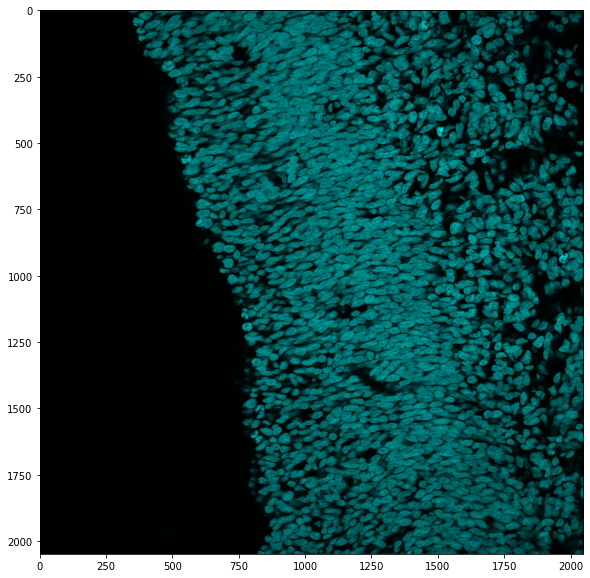

In [5]:
img.show()

## Create masks

In [6]:
model = sm.Unet("efficientnetb0", activation="softmax",
                input_shape=(224, 224, 3), encoder_weights='imagenet',
               classes=3)
model.load_weights(MODELPATH)

In [7]:
def segment(model, tiff):
    tiff.seek_image(c=REFCHANNEL)
    return segment_image(model, tiff.img)

def segment_best(model, tiff):
    tiff.seek_image(c=REFCHANNEL)
    return quick_segment(model, tiff.img)

In [9]:
mask2 = segment_best(model, img)

CPU times: user 35.9 s, sys: 3 s, total: 38.9 s
Wall time: 11.1 s


In [11]:
np.sum(mask != mask2)

0

dtype('bool')

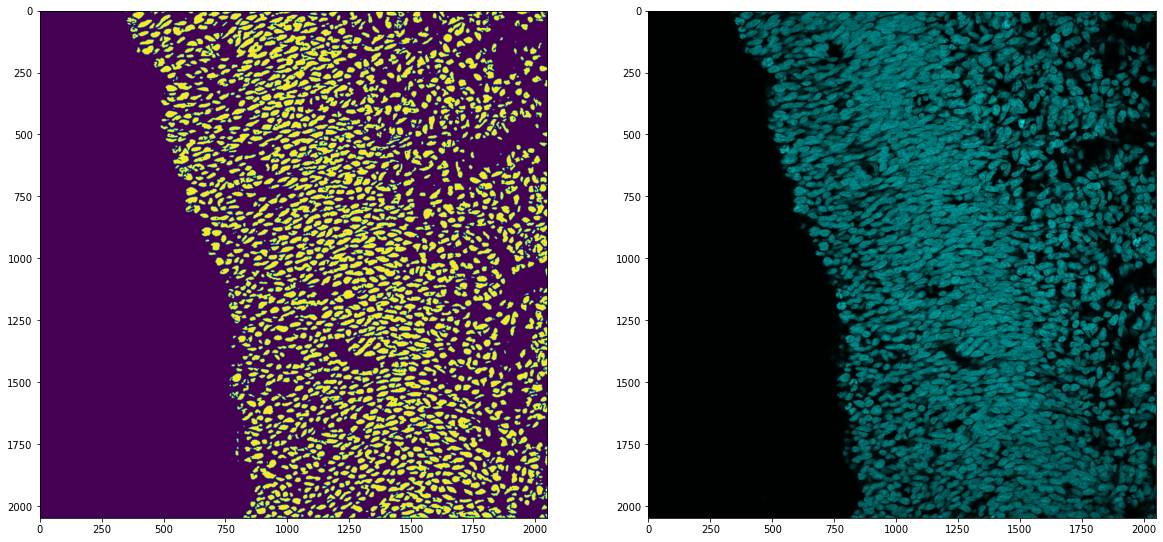

In [12]:
mask = segment(model, img)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.subplot(1, 2, 2)
plt.imshow(img.img)
mask.dtype

In [13]:
raise

RuntimeError: No active exception to reraise